In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from PIL import Image


In [3]:
dataset_path = "./Downloads/Data/train2" 

In [5]:
class_labels = sorted(os.listdir(dataset_path))
num_classes = len(class_labels)
print(f"Detected {num_classes} classes.")

Detected 25 classes.


In [7]:
IMG_SIZE = 256
image_list = []
label_list = []

In [9]:
def load_images():
    for idx, label in enumerate(class_labels):
        folder_path = os.path.join(dataset_path, label)
        for img_file in os.listdir(folder_path):
            try:
                img_path = os.path.join(folder_path, img_file)
                img = Image.open(img_path).convert("RGB").resize((IMG_SIZE, IMG_SIZE))
                image_list.append(np.array(img))
                label_list.append(idx)
            except Exception as e:
                print(f"Error loading {img_file}: {e}")

load_images()

In [13]:
X = np.array(image_list)
y = to_categorical(np.array(label_list), num_classes=num_classes)


In [15]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
x_train = x_train / 255.0
x_val = x_val / 255.0

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

C:\Users\Pawan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      33,554,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           6,425 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,654,361 (128.38 MB)

 Trainable params: 33,654,361 (128.38 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
epochs = 30
batch_size = 32
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stop])


Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 118s 889ms/step - accuracy: 0.1119 - loss: 3.0670 - val_accuracy: 0.4280 - val_loss: 2.1018
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 109s 875ms/step - accuracy: 0.3723 - loss: 2.1180 - val_accuracy: 0.6310 - val_loss: 1.5605
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 106s 845ms/step - accuracy: 0.5229 - loss: 1.6347 - val_accuracy: 0.6870 - val_loss: 1.2020
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 107s 860ms/step - accuracy: 0.5719 - loss: 1.4196 - val_accuracy: 0.7060 - val_loss: 1.0470
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 105s 843ms/step - accuracy: 0.6247 - loss: 1.1773 - val_accuracy: 0.7340 - val_loss: 0.9254
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 111s 889ms/step - accuracy: 0.6807 - loss: 1.0551 - val_accuracy: 0.7600 - val_loss: 0.8924
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 106s 844ms/step - accuracy: 0.6867 - loss: 0.9588 - val_accuracy: 0.7690 - val_loss: 0.7930
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 108s 864ms/step - accuracy: 0.7240 -

In [23]:
 model.save("my_modell.h5")


In [25]:
# Example for validation data
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Validation Accuracy: {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.8109 - loss: 0.6108
Validation Accuracy: 0.8130


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


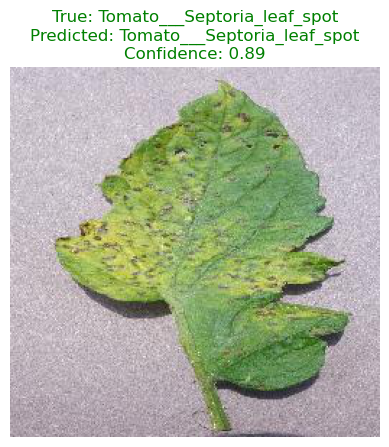

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a random index from the validation set
index = np.random.randint(0, len(x_val))

# Get the sample image and label
sample_image = x_val[index]
true_label = np.argmax(y_val[index])

# Predict using the model
prediction_probs = model.predict(np.expand_dims(sample_image, axis=0))  # shape (1, num_classes)
predicted_label = np.argmax(prediction_probs)

# Confidence score
confidence = prediction_probs[0][predicted_label]

# Plot the image with labels
plt.imshow(sample_image)
plt.axis('off')
plt.title(f"True: {class_labels[true_label]}\nPredicted: {class_labels[predicted_label]}\nConfidence: {confidence:.2f}",
          color="green" if predicted_label == true_label else "red")
plt.show()


In [35]:
# Use the trained model to predict on the test data
y_pred_prob = model.predict(x_val)  # This gives probabilities


32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 570ms/step


In [39]:
import numpy as np

# Predicted labels (class indices)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels (assuming one-hot encoded)
y_true = np.argmax(y_val, axis=1)


In [41]:
#chi-square test

In [43]:
import numpy as np
from sklearn.metrics import confusion_matrix
from scipy.stats import chi2_contingency

In [45]:
conf_matrix = confusion_matrix(y_true, y_pred)

In [47]:
chi2, p, dof, expected = chi2_contingency(conf_matrix)

In [49]:
print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
print("Expected Frequencies Table:\n", expected)

Chi-Square Statistic: 14454.169633004949
Degrees of Freedom: 576
P-Value: 0.0
Expected Frequencies Table:
 [[1.776 1.968 2.064 3.552 1.584 2.208 2.256 2.112 1.488 1.44  1.728 1.824
  1.632 1.776 1.536 2.016 1.824 1.488 1.968 1.824 1.248 1.872 1.776 2.64
  2.4  ]
 [1.554 1.722 1.806 3.108 1.386 1.932 1.974 1.848 1.302 1.26  1.512 1.596
  1.428 1.554 1.344 1.764 1.596 1.302 1.722 1.596 1.092 1.638 1.554 2.31
  2.1  ]
 [1.739 1.927 2.021 3.478 1.551 2.162 2.209 2.068 1.457 1.41  1.692 1.786
  1.598 1.739 1.504 1.974 1.786 1.457 1.927 1.786 1.222 1.833 1.739 2.585
  2.35 ]
 [1.517 1.681 1.763 3.034 1.353 1.886 1.927 1.804 1.271 1.23  1.476 1.558
  1.394 1.517 1.312 1.722 1.558 1.271 1.681 1.558 1.066 1.599 1.517 2.255
  2.05 ]
 [1.406 1.558 1.634 2.812 1.254 1.748 1.786 1.672 1.178 1.14  1.368 1.444
  1.292 1.406 1.216 1.596 1.444 1.178 1.558 1.444 0.988 1.482 1.406 2.09
  1.9  ]
 [1.665 1.845 1.935 3.33  1.485 2.07  2.115 1.98  1.395 1.35  1.62  1.71
  1.53  1.665 1.44  1.89  1.71  1.395 

In [51]:
if p < 0.05:
    print("✅ The result is statistically significant. Predictions differ from actual labels.")
else:
    print("❌ The result is NOT statistically significant. No strong evidence of difference.")

✅ The result is statistically significant. Predictions differ from actual labels.


In [53]:
#

In [55]:
#t-test

In [57]:
from scipy.stats import ttest_rel
import numpy as np


In [59]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)


In [61]:
t_stat, p_value = ttest_rel(y_true, y_pred)

In [63]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.528286104538781
P-value: 0.5974181052520083


In [65]:
alpha = 0.05
if p_value < alpha:
    print("📉 Significant difference between true and predicted labels (reject H0)")
else:
    print("✅ No significant difference (fail to reject H0)")

✅ No significant difference (fail to reject H0)


In [67]:
#

In [69]:
#

In [71]:
#friedman test

In [83]:
import pandas as pd
import numpy as np


data = {
    'ImageID': range(1, 101),
    'Original': np.random.uniform(0.7, 1.0, 100),
    'Histogram_Equalized': np.random.uniform(0.7, 1.0, 100),
    'CLAHE': np.random.uniform(0.7, 1.0, 100)
}

df_scores = pd.DataFrame(data)


In [85]:
from scipy.stats import friedmanchisquare

# Perform the test on the three preprocessing score columns
stat, p = friedmanchisquare(
    df_scores['Original'], 
    df_scores['Histogram_Equalized'], 
    df_scores['CLAHE']
)

print(f'Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('No significant differences between the preprocessing techniques.')
else:
    print('Significant differences between the preprocessing techniques.')


Statistics=0.140, p=0.932
No significant differences between the preprocessing techniques.


In [87]:
#

In [89]:
#wilcoxon test

In [93]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon


np.random.seed(42)
data = {
    'ImageID': range(1, 101),
    'No_Preprocessing': np.random.uniform(0.75, 0.95, 100),
    'Histogram_Equalized': np.random.uniform(0.76, 0.96, 100)
}

df_scores = pd.DataFrame(data)


stat, p = wilcoxon(df_scores['No_Preprocessing'], df_scores['Histogram_Equalized'])


print(f'Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('No significant difference between the two techniques.')
else:
    print('Significant difference between the two techniques.')


Statistics=2037.000, p=0.093
No significant difference between the two techniques.


In [95]:
#

In [97]:
#ANOVA test

 Data Preview:
   ImageID  No_Preprocessing  Histogram_Equalized     CLAHE
0        1          0.801206             0.868131  0.807423
1        2          0.902682             0.959451  0.942188
2        3          0.802530             0.971025  0.865892
3        4          0.981619             0.871463  0.925865
4        5          0.874666             0.858382  0.887136


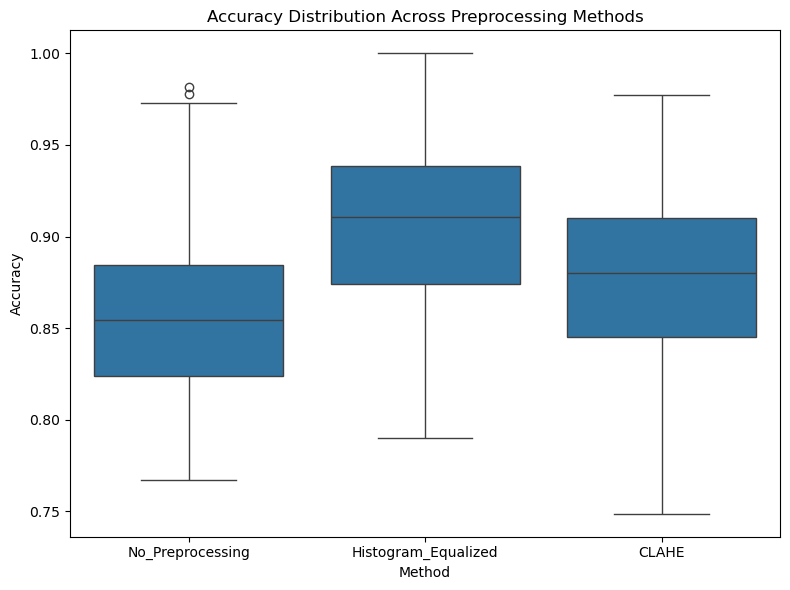


ANOVA Test Results:
F-statistic: 31.251
p-value: 0.000

Conclusion: There is a statistically significant difference among the three methods.


In [107]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns


method1 = np.clip(np.random.normal(loc=0.85, scale=0.05, size=100), 0, 1)
method2 = np.clip(np.random.normal(loc=0.90, scale=0.05, size=100), 0, 1)
method3 = np.clip(np.random.normal(loc=0.87, scale=0.05, size=100), 0, 1)

# Build a DataFrame with an ImageID for clarity
df = pd.DataFrame({
    'ImageID': range(1, 100+1),
    'No_Preprocessing': method1,
    'Histogram_Equalized': method2,
    'CLAHE': method3
})

print(" Data Preview:")
print(df.head())


df_melted = df.melt(id_vars=['ImageID'], 
                    var_name='Preprocessing_Method', 
                    value_name='Accuracy')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Preprocessing_Method', y='Accuracy', data=df_melted)
plt.title("Accuracy Distribution Across Preprocessing Methods")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


F_statistic, p_value = f_oneway(df['No_Preprocessing'],
                                df['Histogram_Equalized'],
                                df['CLAHE'])

print("\nANOVA Test Results:")
print(f"F-statistic: {F_statistic:.3f}")
print(f"p-value: {p_value:.3f}")


alpha = 0.05
if p_value < alpha:
    print("\nConclusion: There is a statistically significant difference among the three methods.")
else:
    print("\nConclusion: No statistically significant difference was detected among the three methods.")


In [109]:
pip install scikit-posthocs



  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
Using cached packaging-24.2-py3-none-any.whl (65 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


 Data Preview:
   No_Preprocessing  Histogram_Equalized     CLAHE
0          0.874836             0.829231  0.887889
1          0.843087             0.878968  0.898039
2          0.882384             0.882864  0.924153
3          0.926151             0.859886  0.922690
4          0.838292             0.891936  0.801117


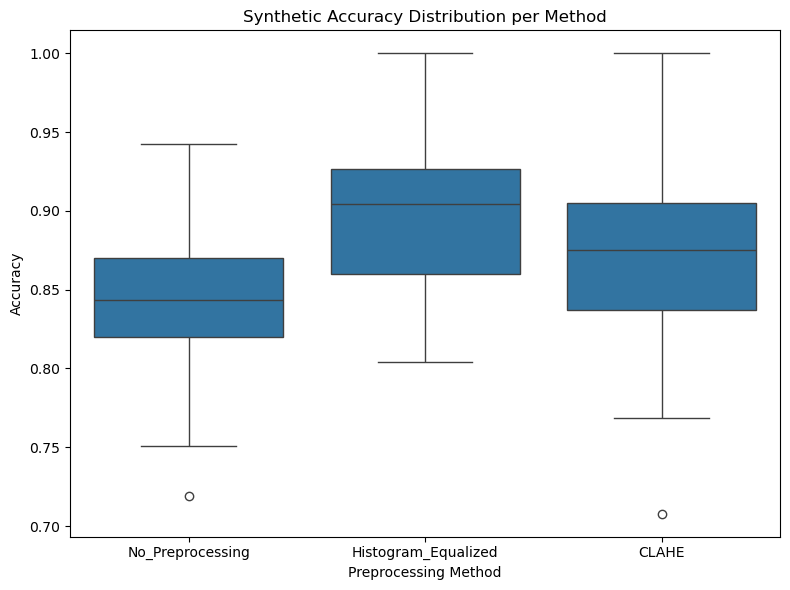


Nemenyi Post-hoc Test p-values:
                     No_Preprocessing  Histogram_Equalized     CLAHE
No_Preprocessing         1.000000e+00         2.081135e-11  0.000013
Histogram_Equalized      2.081135e-11         1.000000e+00  0.061160
CLAHE                    1.283251e-05         6.116000e-02  1.000000


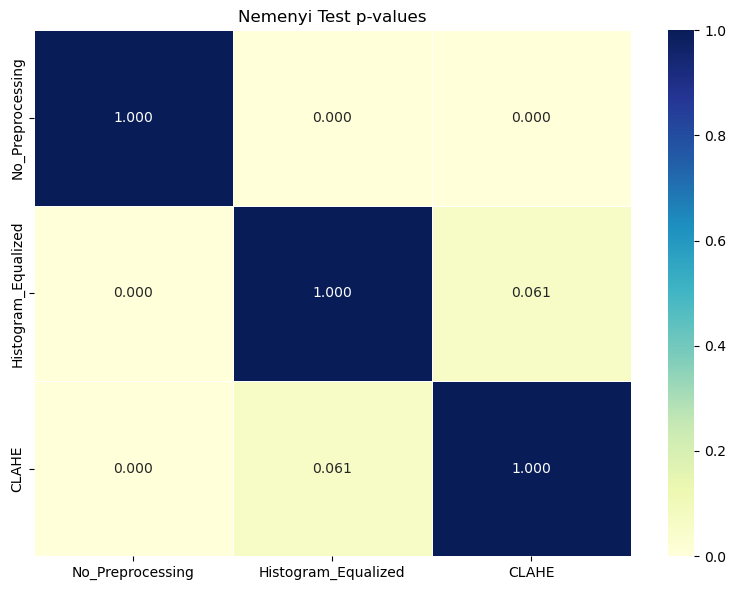

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp


np.random.seed(42)
n = 100  # number of images (samples)


method1 = np.clip(np.random.normal(loc=0.85, scale=0.05, size=n), 0, 1)
method2 = np.clip(np.random.normal(loc=0.90, scale=0.05, size=n), 0, 1)
method3 = np.clip(np.random.normal(loc=0.87, scale=0.05, size=n), 0, 1)

# Build the DataFrame
df = pd.DataFrame({
    'No_Preprocessing': method1,
    'Histogram_Equalized': method2,
    'CLAHE': method3
})

print(" Data Preview:")
print(df.head())


df_melted = df.melt(var_name='Method', value_name='Accuracy')
plt.figure(figsize=(8,6))
sns.boxplot(x='Method', y='Accuracy', data=df_melted)
plt.title("Synthetic Accuracy Distribution per Method")
plt.xlabel("Preprocessing Method")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

nemenyi_result = sp.posthoc_nemenyi_friedman(df.values)

# Label rows and columns for clarity
nemenyi_result.columns = df.columns
nemenyi_result.index = df.columns

print("\nNemenyi Post-hoc Test p-values:")
print(nemenyi_result)


plt.figure(figsize=(8,6))
sns.heatmap(nemenyi_result, annot=True, cmap="YlGnBu", fmt=".3f", linewidths=0.5)
plt.title("Nemenyi Test p-values")
plt.tight_layout()
plt.show()


In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 📊 Evaluate model on validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f"\nValidation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - accuracy: 0.8109 - loss: 0.6108

Validation Loss: 0.5888
Validation Accuracy: 0.8130


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.79      0.79      0.79        48
                                 Apple___Black_rot       0.86      0.88      0.87        42
                          Apple___Cedar_apple_rust       0.80      0.83      0.81        47
                                   Apple___healthy       0.73      0.73      0.73        41
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.76      0.84        38
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99        45
               Corn_(maize)___Northern_Leaf_Blight       0.82      0.97      0.89        38
                            Corn_(maize)___healthy       1.00      1.00      1.00        44
                                 Grape___Black_rot       0.96      0.84      0.90        32
              

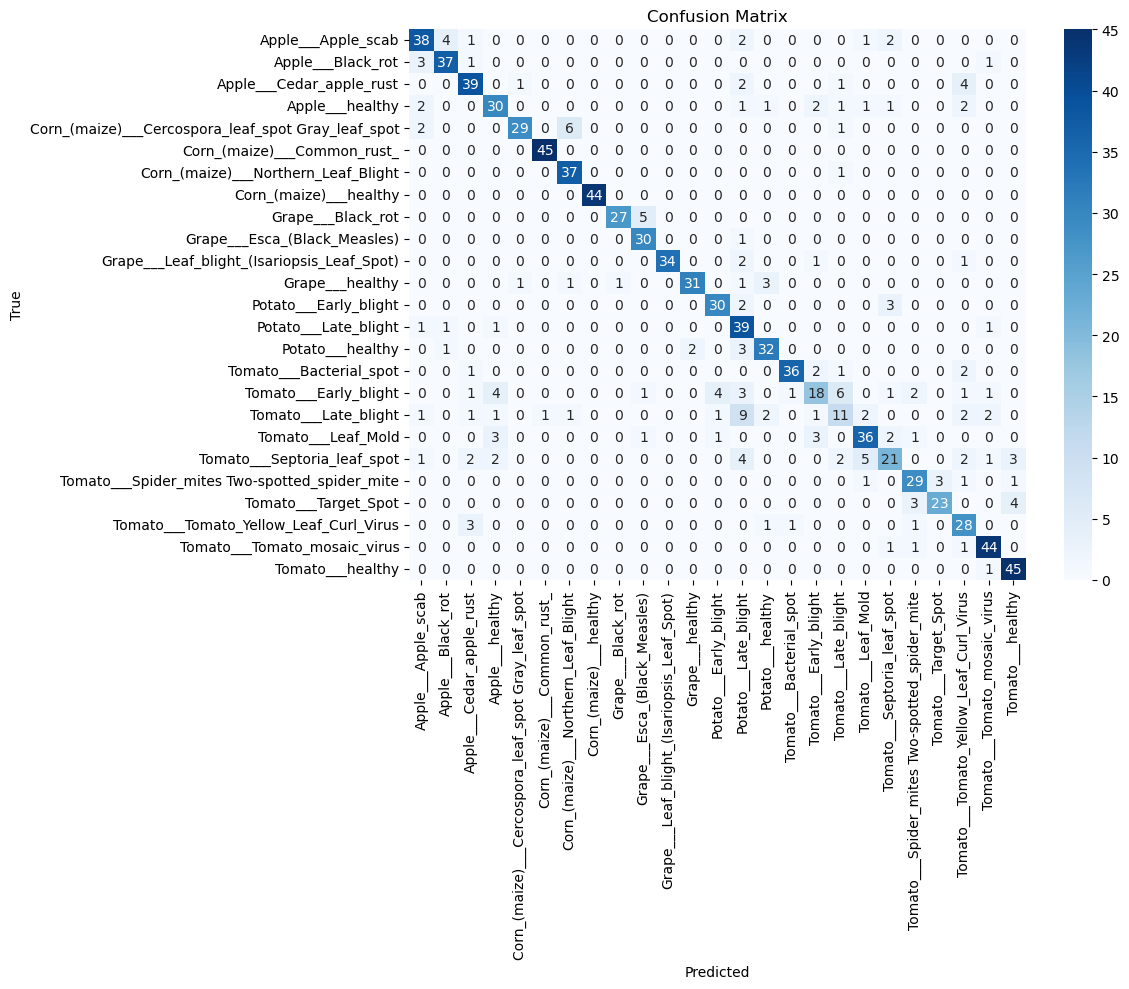

In [33]:
# 🔮 Make predictions
y_pred_probs = model.predict(x_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# 📑 Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# 🔁 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# 🎨 Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


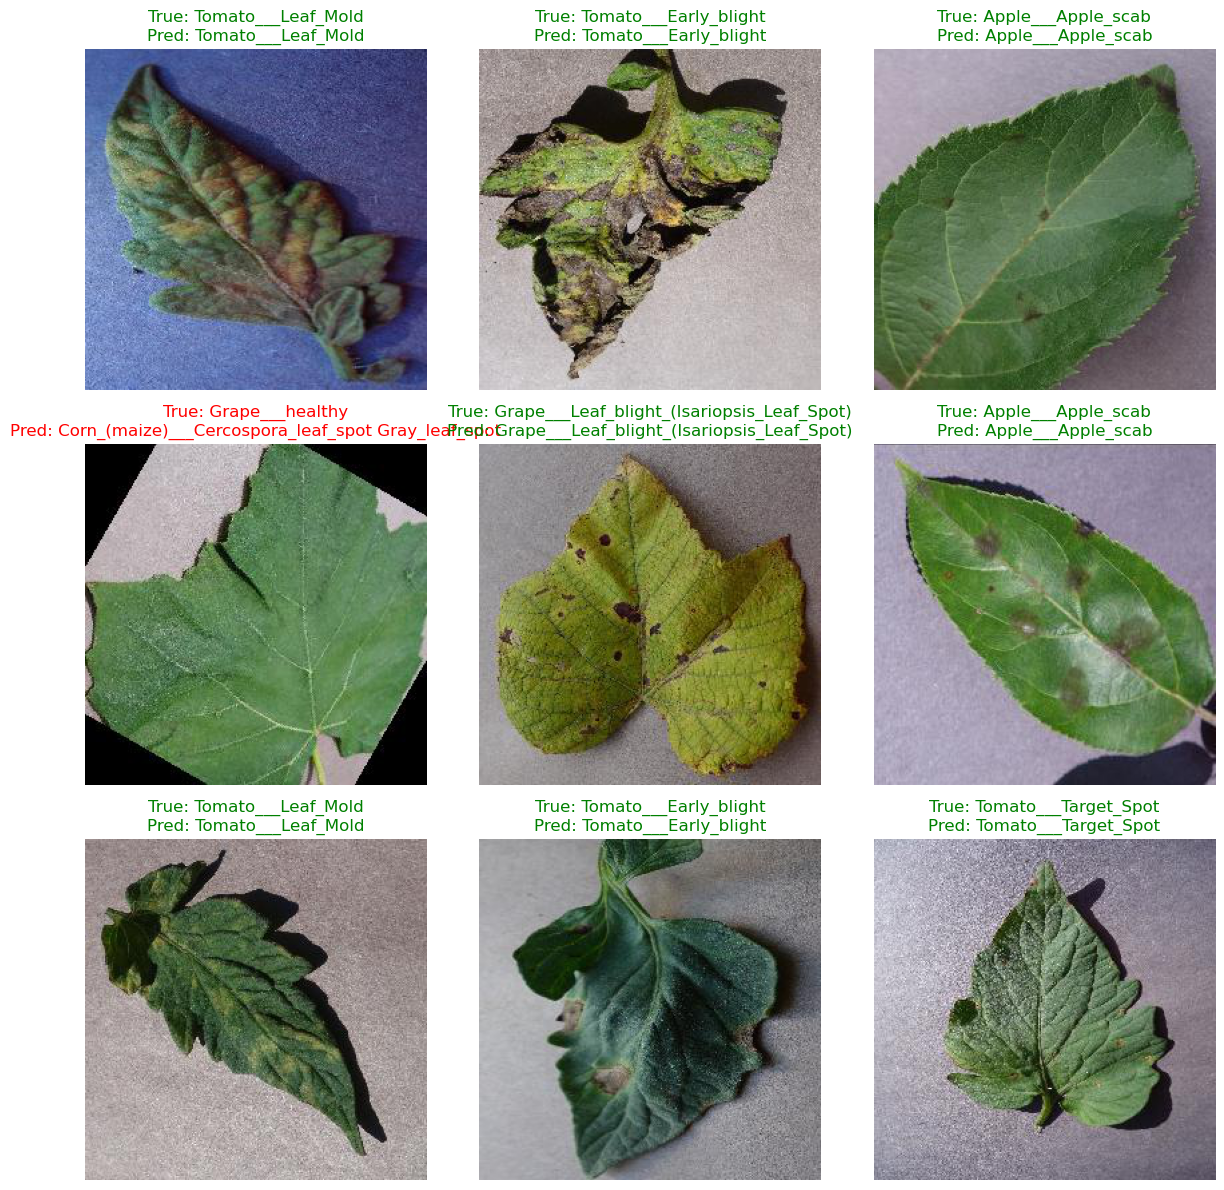

In [121]:
# 🔍 Visualizing a few predictions
def plot_predictions(images, true_labels, pred_labels, class_names, num=9):
    plt.figure(figsize=(12, 12))
    for i in range(num):
        idx = np.random.randint(0, len(images))
        plt.subplot(3, 3, i+1)
        plt.imshow(images[idx])
        true_class = class_names[true_labels[idx]]
        pred_class = class_names[pred_labels[idx]]
        plt.title(f"True: {true_class}\nPred: {pred_class}",
                  color="green" if true_class == pred_class else "red")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call the function
plot_predictions(x_val, y_true, y_pred, class_labels)


In [123]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# -----------------------
# a) State the Hypothesis
# -----------------------
# H0 (Null Hypothesis): The CNN model performs no better than random guessing.
# H1 (Alternative Hypothesis): The CNN model performs significantly better than random guessing.

# -------------------------------
# b) Formulate an Analysis Plan
# -------------------------------
# 1. Use the validation dataset (x_val, y_val)
# 2. Calculate prediction accuracy, precision, recall, F1-score
# 3. Use confusion matrix to observe class-wise performance
# 4. Perform significance testing on accuracy vs baseline (optional)

# -----------------------
# c) Analyze Sample Data
# -----------------------

# Predict
y_pred_probs = model.predict(x_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# Accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Validation Accuracy: {accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 561ms/step
Validation Accuracy: 0.7590


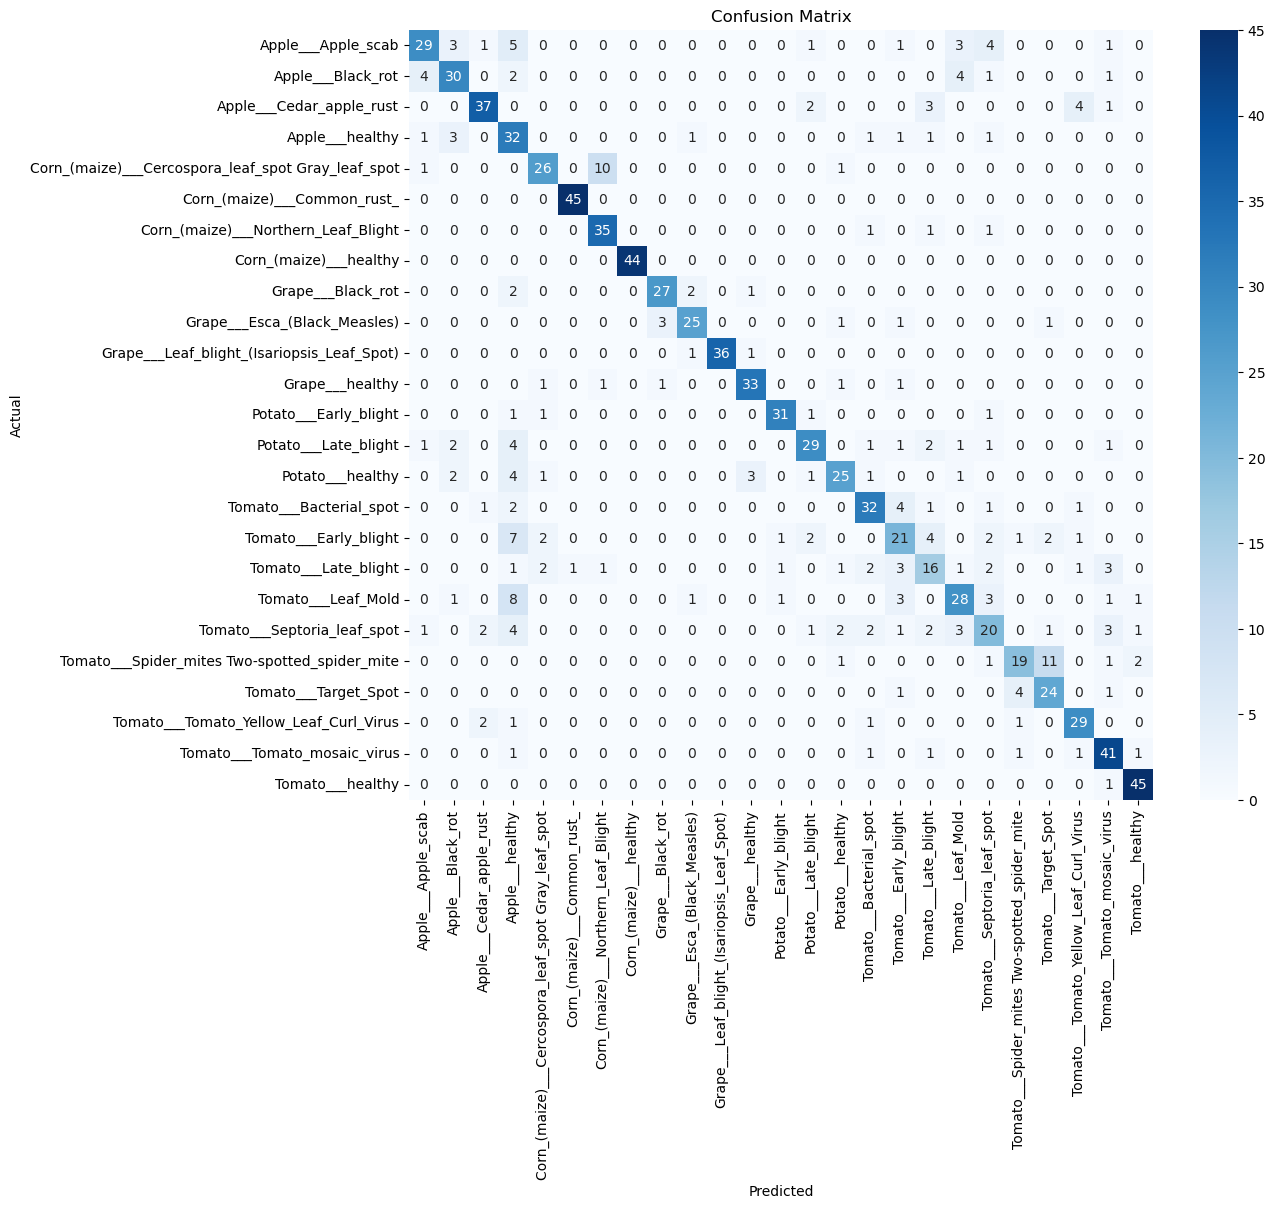

In [127]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [129]:
# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.78      0.60      0.68        48
                                 Apple___Black_rot       0.73      0.71      0.72        42
                          Apple___Cedar_apple_rust       0.86      0.79      0.82        47
                                   Apple___healthy       0.43      0.78      0.56        41
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.79      0.68      0.73        38
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99        45
               Corn_(maize)___Northern_Leaf_Blight       0.74      0.92      0.82        38
                            Corn_(maize)___healthy       1.00      1.00      1.00        44
                                 Grape___Black_rot       0.87      0.84      0.86        32
                      Grape___Esca_(Black_Measles)     

In [133]:
# 🔍 Try to find the healthy class label
healthy_classes = [label for label in class_labels if 'healthy' in label.lower()]
print("Detected healthy classes:", healthy_classes)

# For simplicity, let’s assume one healthy class (e.g., 'Tomato___healthy')
# If multiple healthy classes, adapt logic accordingly
if healthy_classes:
    healthy_label = healthy_classes[0]
    healthy_index = class_labels.index(healthy_label)

    # Convert to binary: 1 = diseased, 0 = healthy
    y_true_binary = (y_true != healthy_index).astype(int)
    y_pred_binary = (y_pred != healthy_index).astype(int)

    # Generate binary confusion matrix
    from sklearn.metrics import confusion_matrix
    tn, fp, fn, tp = confusion_matrix(y_true_binary, y_pred_binary).ravel()

    type_I_error_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
    type_II_error_rate = fn / (fn + tp) if (fn + tp) != 0 else 0

    print("\nType-I Error (False Positive Rate):", round(type_I_error_rate, 4))
    print("Type-II Error (False Negative Rate):", round(type_II_error_rate, 4))
else:
    print("No class with 'healthy' found in class labels.")


Detected healthy classes: ['Apple___healthy', 'Corn_(maize)___healthy', 'Grape___healthy', 'Potato___healthy', 'Tomato___healthy']

Type-I Error (False Positive Rate): 0.2195
Type-II Error (False Negative Rate): 0.0438
